# Plots for the Flory-Huggins model
Model:
$$ f(\phi) = k_\mathrm{B} T \left[ \phi \log(\phi) + (1-\phi) \log(1-\phi) + \chi \phi (1-\phi) \right]. $$
The chemical potential and osmotic pressure of this model are given by
$$ \mu = \frac{\partial f}{\partial \phi} = k_\mathrm{B} T \left[ \log\left(\frac{\phi}{1-\phi}\right) + \chi (1-2\phi) \right], $$
and
$$ p(\phi) = -f(\phi) + \phi f'(\phi) - f(0) = - k_\mathrm{B} T \left[ \log(1-\phi) + \chi \phi^2 \right], $$
taking $f(0) = \lim_{\phi \to 0} f(\phi) = 0$.

In [1]:
# Python libraries
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
# Expressions for the free energy, pressure, chemical potential (per kB T).
def f(x, c): return x * np.log(x) + (1-x) * np.log(1-x) + c * x * (1-x)
def p(x, c): return - np.log(1-x) - c * x * x
def mu(x, c): return np.log(x/(1-x)) + c * (1-2*x)

/var/folders/5r/g2fvt6sn1w9082pds0ssjr3wq1w9vg/T/ipykernel_38619/1600870512.py:2: RuntimeWarning: divide by zero encountered in log
  def f(x, c): return x * np.log(x) + (1-x) * np.log(1-x) + c * x * (1-x)
/var/folders/5r/g2fvt6sn1w9082pds0ssjr3wq1w9vg/T/ipykernel_38619/1600870512.py:2: RuntimeWarning: invalid value encountered in multiply
  def f(x, c): return x * np.log(x) + (1-x) * np.log(1-x) + c * x * (1-x)


(0.0, 1.0)

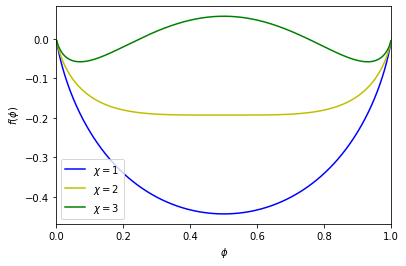

In [4]:
# Plot the free energy, for three different values of chi (1, 2, 3; 2 is the critical value).
x = np.linspace(0,1,1000)
plt.plot(x, f(x,1), 'b')
plt.plot(x, f(x,2), 'y')
plt.plot(x, f(x,3), 'g')
plt.xlabel('$\phi$')
plt.ylabel('$f(\phi)$')
plt.legend(['$\chi = 1$','$\chi = 2$','$\chi = 3$'])
plt.xlim((0,1))

Note that from the plot (or functional form) of $f(\phi)$, we can see that it is symmetric in $\phi = \frac12$, and that the common tangent will connect the two minima. The coexistence conditions then translate to finding the two minima for $\chi > \chi_\mathrm{c} = 2$, which gives
$$ \chi = - \frac{1}{1-2\phi} \log\left(\frac{\phi}{1-\phi}\right). $$
For the spinodal, we solve as usual for the points where the second derivative of the free energy vanishes:
$$ 0 = \frac{\partial^2 f}{\partial \phi^2} = k_\mathrm{B} T \left[ \frac{1}{\phi} + \frac{1}{1-\phi} - 2 \chi \right] $$
so
$$ \chi = \frac12 \left(\frac{1}{\phi} + \frac{1}{1-\phi} \right)$$
for the spinodal.

In [8]:
# Chi as a function of phi for the binodal.
def chibin(x): return (-1/(1-2*x))*np.log(x/(1-x))
# Spinodal
def chispin(x): return 0.5*((1/x) + (1/(1-x)))

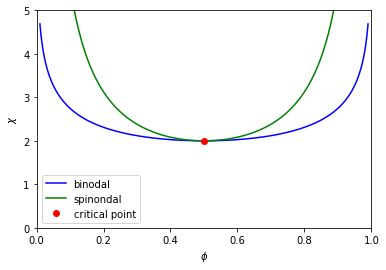

In [17]:
# Plot the binodal and spinodal in the (phi, chi) plane.
x = np.linspace(0.01,0.99,998)
plt.plot(x, chibin(x), 'b')
plt.plot(x, chispin(x), 'g')
plt.plot(0.5, 2, 'ro')
plt.xlabel('$\phi$')
plt.ylabel('$\chi$')
plt.legend(['binodal','spinondal','critical point'])
plt.xlim((0,1))
plt.ylim((0,5))
plt.savefig("FHphasediagram.pdf", format="pdf", bbox_inches="tight")